11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               20096     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
375/375 [==============================] - 20s 48ms/step - loss: 0.6718 - accuracy: 0.7746 - val_loss: 0.2698 - val_accuracy: 0.9162
Epoch 2/15
375/375 [==============================] - 11s 28ms/step - loss: 0.2215 - accuracy: 0.9327 - val_loss: 0.1834 - val_accuracy: 0.9442
Epoch 3/15
375/375 [==============================] - 10s 27ms/step - loss: 0.1725 - accuracy: 

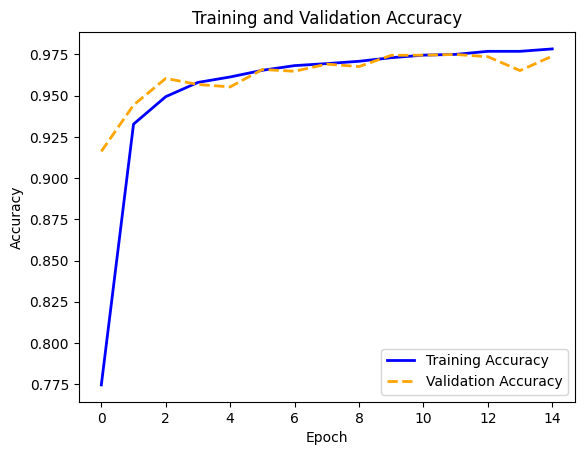

313/313 [==============================] - 1s 3ms/step - loss: 0.0914 - accuracy: 0.9721
Test Loss: 0.09138186275959015
Test Accuracy: 0.972100019454956


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to match RNN input shape (batch_size, sequence_length, input_dim)
sequence_length = x_train.shape[1]
input_dim = x_train.shape[2]
x_train_reshaped = x_train.reshape(-1, sequence_length, input_dim)
x_test_reshaped = x_test.reshape(-1, sequence_length, input_dim)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

# Build the RNN model
model = Sequential([
    SimpleRNN(units=128, activation='relu', input_shape=(sequence_length, input_dim)),
    Dense(units=10, activation='softmax')
])

# Model description
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_reshaped, y_train_onehot, epochs=15, batch_size=128, validation_split=0.2)

# Plot accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', linewidth=2, color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', linewidth=2, color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test_onehot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
